In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

In [4]:
url= 'https://www.amazon.com/Barnetts-Biscotti-Christmas-Thanksgiving-Valentines/dp/B006J7TAHM/ref=sr_1_3_sspa?crid=1OUEOD11XBDM4&keywords=fine+food&qid=1667596117&qu=eyJxc2MiOiIwLjAwIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=fine+food%2Caps%2C78&sr=8-3-spons&psc=1#customerReviews'
req = requests.get('http://localhost:8050/render.html', params={'url': url, 'wait': 2})

In [32]:

review_List=[]
def get_reviews(url):
    req = requests.get('http://localhost:8050/render.html', params={'url': url, 'wait': 2})
    soup = BeautifulSoup(req.text, 'html.parser')
    return soup

In [33]:
soup= BeautifulSoup(req.text,'html.parser')

<!DOCTYPE html>
<html class="a-js a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-gradients a-transform3d a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition" data-19ax5a9jf="dingo" data-aui-build-date="3.22.2-2022-10-29" lang="en-us"><!-- sp:feature:head-start --><head><script async="" crossorigin="anonymous" src="https://m.media-amazon.com/images/G/01/csm/showads.v2.js?adtag=csm&amp;adflag=-google-adsense."></script><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31YXrY93hfL.js"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-e
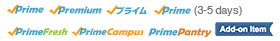

In [34]:
soup

In [24]:
print(soup.title.text)

Amazon.com : Barnett's Christmas Chocolate Gift Baskets, 24 Biscotti Cookie Chocolates Box, Covered Cookies Mens Holiday Gifts, Gourmet Prime Food, Candy Basket Delivery For Men Women Families, Thanksgiving Ideas : Packaged Biscotti Snack Cookies : Grocery & Gourmet Food


In [25]:
reviews = soup.find_all('div', {'data-hook': 'review'})

In [ ]:
def get_text(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.com:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviews_List.append(review)
    except:
        pass

In [35]:

    
for x in range(1,1000):
    soup = get_reviews(f'https://www.amazon.com/Barnetts-Biscotti-Christmas-Thanksgiving-Valentines/dp/B006J7TAHM/ref=sr_1_3_sspa?crid=1OUEOD11XBDM4&keywords=fine+food&qid=1667596117&qu=eyJxc2MiOiIwLjAwIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=fine+food%2Caps%2C78&sr=8-3-spons&psc=1#customerReviews={x}')
    print(f'Getting page: {x}')
    get_text(soup)
    print(len(review_List))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break


Getting page: 1
8
Getting page: 2
16
Getting page: 3
24
Getting page: 4
32
Getting page: 5
40
Getting page: 6
48
Getting page: 7
56
Getting page: 8
64
Getting page: 9
72
Getting page: 10
80
Getting page: 11
88
Getting page: 12
96
Getting page: 13
104
Getting page: 14
112
Getting page: 15
120
Getting page: 16
128
Getting page: 17
136
Getting page: 18
144
Getting page: 19
152
Getting page: 20
160
Getting page: 21
168
Getting page: 22
176
Getting page: 23
184
Getting page: 24
192
Getting page: 25
200
Getting page: 26
208
Getting page: 27
216
Getting page: 28
224
Getting page: 29
232
Getting page: 30
240
Getting page: 31
248
Getting page: 32
256
Getting page: 33
264
Getting page: 34
272
Getting page: 35
280
Getting page: 36
288
Getting page: 37
296
Getting page: 38
304
Getting page: 39
312
Getting page: 40
320
Getting page: 41
328
Getting page: 42
336
Getting page: 43
344
Getting page: 44
352
Getting page: 45
360
Getting page: 46
368
Getting page: 47
376
Getting page: 48
384
Getting page: 

In [42]:
review_List

[{'product': "Amazon.com : Barnett's Christmas Chocolate Gift Baskets, 24 Biscotti Cookie Chocolates Box, Covered Cookies Mens Holiday Gifts, Gourmet Prime Food, Candy Basket Delivery For Men Women Families, Thanksgiving Ideas : Packaged Biscotti Snack Cookies : Grocery & Gourmet Food",
  'title': 'Even though it wasn’t that great - the seller made it right',
  'rating': 4.0,
  'body': 'It’s very taste dependent.\nRead more'},
 {'product': "Amazon.com : Barnett's Christmas Chocolate Gift Baskets, 24 Biscotti Cookie Chocolates Box, Covered Cookies Mens Holiday Gifts, Gourmet Prime Food, Candy Basket Delivery For Men Women Families, Thanksgiving Ideas : Packaged Biscotti Snack Cookies : Grocery & Gourmet Food",
  'title': 'Not bad but.....',
  'rating': 4.0,
  'body': 'A nice box for presentation. The flavors were a little bland for our taste and seemed to be a little stale. It would be giftable but I would only recommend doing so during the winter months. It was shipped with no freezer 

In [47]:
df= pd.DataFrame(review_List)

In [48]:
df

,product,title,rating,body
0,Amazon.com : Barnett's Christmas Chocolate Gif...,Even though it wasn’t that great - the seller ...,4.0,It’s very taste dependent.\nRead more
1,Amazon.com : Barnett's Christmas Chocolate Gif...,Not bad but.....,4.0,A nice box for presentation. The flavors were ...
2,Amazon.com : Barnett's Christmas Chocolate Gif...,fresh,4.0,The main thing to understand is that these coo...
3,Amazon.com : Barnett's Christmas Chocolate Gif...,Delicious!!!!,5.0,Purchased this for a gift for one of those peo...
4,Amazon.com : Barnett's Christmas Chocolate Gif...,Cookies are delicious,5.0,This was for a gift that was well appreciated\...
...,...,...,...,...
2723,Amazon.com : Barnett's Christmas Chocolate Gif...,Delicious!!!!,5.0,Purchased this for a gift for one of those peo...
2724,Amazon.com : Barnett's Christmas Chocolate Gif...,Cookies are delicious,5.0,This was for a gift that was well appreciated\...
2725,Amazon.com : Barnett's Christmas Chocolate Gif...,so delish,5.0,these are great and a perfect gift!\nRead more
2726,Amazon.com : Barnett's Christmas Chocolate Gif...,Nice presentation..,5.0,Great appearance and delicious product..given ...


In [52]:
df.to_csv('amazonreviews.csv', index= False)

In [54]:
df.to_csv(r'/Users/miswagandhi/Desktop/amazonreviews.csv')

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import os
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'/Users/miswagandhi/Desktop/amazonreviews.csv')

In [4]:
df1.head(10)

,Unnamed: 0,product,title,rating,body
0,0,Amazon.com : Barnett's Christmas Chocolate Gif...,Even though it wasn’t that great - the seller ...,4.0,It’s very taste dependent.\nRead more
1,1,Amazon.com : Barnett's Christmas Chocolate Gif...,Not bad but.....,4.0,A nice box for presentation. The flavors were ...
2,2,Amazon.com : Barnett's Christmas Chocolate Gif...,fresh,4.0,The main thing to understand is that these coo...
3,3,Amazon.com : Barnett's Christmas Chocolate Gif...,Delicious!!!!,5.0,Purchased this for a gift for one of those peo...
4,4,Amazon.com : Barnett's Christmas Chocolate Gif...,Cookies are delicious,5.0,This was for a gift that was well appreciated\...
5,5,Amazon.com : Barnett's Christmas Chocolate Gif...,so delish,5.0,these are great and a perfect gift!\nRead more
6,6,Amazon.com : Barnett's Christmas Chocolate Gif...,Nice presentation..,5.0,Great appearance and delicious product..given ...
7,7,Amazon.com : Barnett's Christmas Chocolate Gif...,Very Tasty!!,5.0,"Very tasty, Delivered with all Biscottis intac..."
8,8,Amazon.com : Barnett's Christmas Chocolate Gif...,Even though it wasn’t that great - the seller ...,4.0,It’s very taste dependent.\nRead more
9,9,Amazon.com : Barnett's Christmas Chocolate Gif...,Not bad but.....,4.0,A nice box for presentation. The flavors were ...


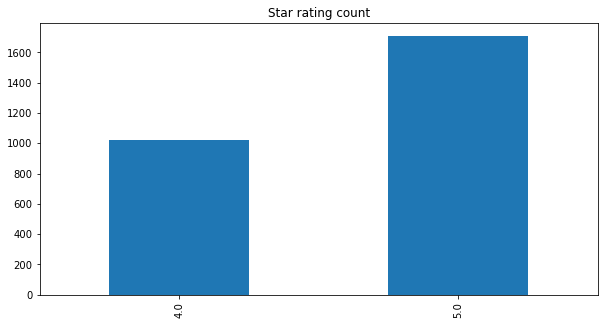

In [5]:
plot = df1['rating'].value_counts().sort_index() \
       .plot(kind='bar', title='Star rating count', figsize=(10,5))
plt.show()

In [7]:
!pip install -U textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 6.2 MB/s eta 0:00:00a 0:00:01


In [8]:
from textblob import TextBlob

In [22]:
text = df1.body.values
text[3]

'Purchased this for a gift for one of those people who has pretty much all she needs.She opened it and was so surprised at how beautiful everything looked.  As she was tasting, I was nervous since I never tasted them, she loved them!!!!!Highly recommend!!\nRead more'

In [26]:
blob.words

WordList(['Purchased', 'this', 'for', 'a', 'gift', 'for', 'one', 'of', 'those', 'people', 'who', 'has', 'pretty', 'much', 'all', 'she', 'needs.She', 'opened', 'it', 'and', 'was', 'so', 'surprised', 'at', 'how', 'beautiful', 'everything', 'looked', 'As', 'she', 'was', 'tasting', 'I', 'was', 'nervous', 'since', 'I', 'never', 'tasted', 'them', 'she', 'loved', 'them', 'Highly', 'recommend', 'Read', 'more'])

In [24]:
blob = TextBlob(text[3])
blob.tags          

[('Purchased', 'VBN'),
 ('this', 'DT'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('gift', 'NN'),
 ('for', 'IN'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('those', 'DT'),
 ('people', 'NNS'),
 ('who', 'WP'),
 ('has', 'VBZ'),
 ('pretty', 'RB'),
 ('much', 'JJ'),
 ('all', 'DT'),
 ('she', 'PRP'),
 ('needs.She', 'RB'),
 ('opened', 'VBD'),
 ('it', 'PRP'),
 ('and', 'CC'),
 ('was', 'VBD'),
 ('so', 'RB'),
 ('surprised', 'JJ'),
 ('at', 'IN'),
 ('how', 'WRB'),
 ('beautiful', 'JJ'),
 ('everything', 'NN'),
 ('looked', 'VBD'),
 ('As', 'IN'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('tasting', 'VBG'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('nervous', 'JJ'),
 ('since', 'IN'),
 ('I', 'PRP'),
 ('never', 'RB'),
 ('tasted', 'VBD'),
 ('them', 'PRP'),
 ('she', 'PRP'),
 ('loved', 'VBD'),
 ('them', 'PRP'),
 ('Highly', 'NNP'),
 ('recommend', 'NN'),
 ('Read', 'VB'),
 ('more', 'RBR')]

In [25]:
blob.noun_phrases

WordList(['purchased', 'highly', 'read'])

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miswagandhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/miswagandhi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/miswagandhi/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True